<IPython.core.display.Javascript object>


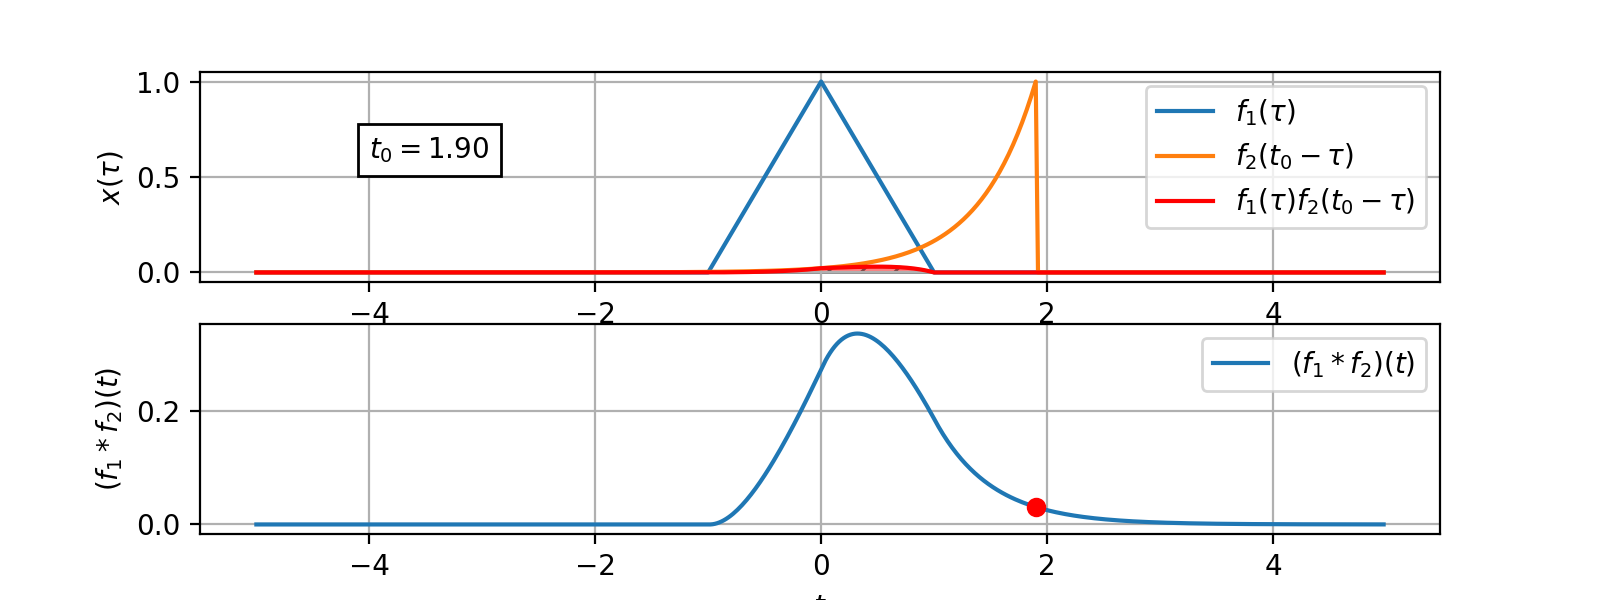

In [1]:
#https://stackoverflow.com/questions/56095788/convolution-integral-export-as-animation
%matplotlib notebook
import scipy.integrate
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

def showConvolution(t0,f1, f2):
    # Calculate the overall convolution result using Simpson integration
    convolution = np.zeros(len(t))
    for n, t_ in enumerate(t):
        prod = lambda tau: f1(tau) * f2(t_-tau)
        convolution[n] = scipy.integrate.simps(prod(t), t)

    # Create the shifted and flipped function
    f_shift = lambda t: f2(t0-t)
    prod = lambda tau: f1(tau) * f2(t0-tau)

    # Plot the curves
    plt.gcf().clear() # il

    plt.subplot(211)
    plt.gca().set_ymargin(0.05) # il
    plt.plot(t, f1(t), label=r'$f_1(\tau)$')
    plt.plot(t, f_shift(t), label=r'$f_2(t_0-\tau)$')
    plt.fill(t, prod(t), color='r', alpha=0.5, edgecolor='black', hatch='//') # il
    plt.plot(t, prod(t), 'r-', label=r'$f_1(\tau)f_2(t_0-\tau)$')
    plt.grid(True); plt.xlabel(r'$\tau$'); plt.ylabel(r'$x(\tau)$') # il
    plt.legend(fontsize=10) # il
    plt.text(-4, 0.6, '$t_0=%.2f$' % t0, bbox=dict(fc='white')) # il

    # plot the convolution curve
    plt.subplot(212)
    plt.gca().set_ymargin(0.05) # il
    plt.plot(t, convolution, label='$(f_1*f_2)(t)$')

    # recalculate the value of the convolution integral at the current time-shift t0
    current_value = scipy.integrate.simps(prod(t), t)
    plt.plot(t0, current_value, 'ro')  # plot the point
    plt.grid(True); plt.xlabel('$t$'); plt.ylabel('$(f_1*f_2)(t)$') # il
    plt.legend(fontsize=10) # il
    plt.show() # il

Fs = 50  # our sampling frequency for the plotting
T = 5    # the time range we are interested in
t = np.arange(-T, T, 1/Fs)  # the time samples
f1 = lambda t: np.maximum(0, 1-abs(t))
f2 = lambda t: (t>0) * np.exp(-2*t)

t0 = np.arange(-2.0,2.0, 0.05)

fig = plt.figure(figsize=(8,3))
anim = animation.FuncAnimation(fig, showConvolution, frames=t0, fargs=(f1,f2),interval=80)

#anim.save('animation.mp4', fps=30) # fps = frames per second

plt.show()